# Testing GN, N fast on a real network

- GN is very-very slow, so I have chosen relatively small network
    - https://snap.stanford.edu/data/egonets-Facebook.html
    
    
---

In [2]:
import igraph

import sys
sys.path.append('../my_modules')
from igraph_method_wrappers import load_ig_from_edges_file
from igraph_method_wrappers import test_igraph_method_on_real_graph
from igraph_method_wrappers import plot_real_graph

#### Download data

In [2]:
%%bash
#wget https://snap.stanford.edu/data/facebook_combined.txt.gz
#gunzip facebook_combined.txt.gz

#### Load graph

In [3]:
ig_g,id_name,name_id=load_ig_from_edges_file('facebook_combined.txt')

### Test the two method on the graph

In [4]:
GN=igraph.Graph.community_edge_betweenness
N_fast=igraph.Graph.community_fastgreedy

#### Newton's fast algoritm

In [5]:
NF_membership,NF_modularity,NF_time=test_igraph_method_on_real_graph(ig_g,N_fast)

Modularity: 0.777362280102
It took: 1.93495321274 s


#### Girvan-Newman algorithm

In [6]:
GN_membership,GN_modularity,GN_time=test_igraph_method_on_real_graph(ig_g,GN)

Modularity: 0.814947899846
It took: 72092.798543 s


### Save result to file because it took soooo long to do it

In [3]:
import pickle
#GN_res=(GN_membership,GN_modularity,GN_time)
#pickle.dump(GN_res,open("GN_res.pkl", "wb"))
GN_res=pickle.load(open("GN_res.pkl", "rb"))
GN_membership,GN_modularity,GN_time=GN_res

#NF_res=(NF_membership,NF_modularity,NF_time)
#pickle.dump(NF_res,open("NF_res.pkl", "wb"))
NF_res=pickle.load(open("NF_res.pkl", "rb"))
NF_membership,NF_modularity,NF_time=NF_res

In [5]:
print max(GN_membership),max(NF_membership)

182 14


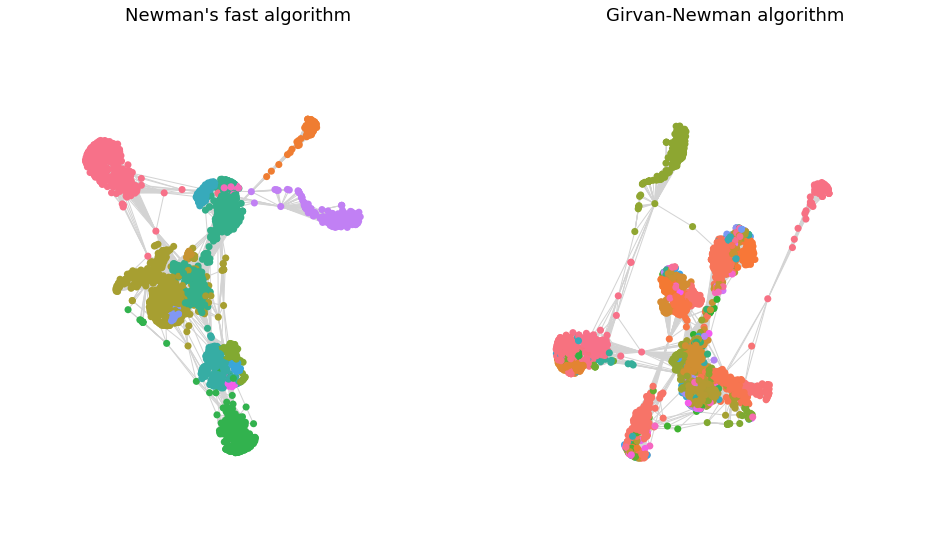

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(16,9))
plot_real_graph('facebook_combined.txt',GN_membership,'Girvan-Newman algorithm',fig.add_subplot(1,2,2))
plot_real_graph('facebook_combined.txt',NF_membership,'Newman\'s fast algorithm',fig.add_subplot(1,2,1))

In [6]:
from girwan_newman_benchmark import  general_fvcc

In [7]:
print general_fvcc(NF_membership,GN_membership)

0.0911116613023


In [8]:
print general_fvcc(GN_membership,NF_membership)

0.538499628621
